In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_json('final.json')

In [5]:
df['Valittu'] = np.where(df['Valittu']==1, 'Kyllä', 'Ei')
disclosures = df[df['url'] != '']

In [6]:
disclosures.loc[disclosures['Puolue/valitsijayhdistys'].apply(lambda x: x[:5] == 'Liike'), 'Puolue/valitsijayhdistys'] = 'Liike Nyt ry'

/Users/ollikortelahti/.local/share/virtualenvs/scraper-4A5yl48G/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


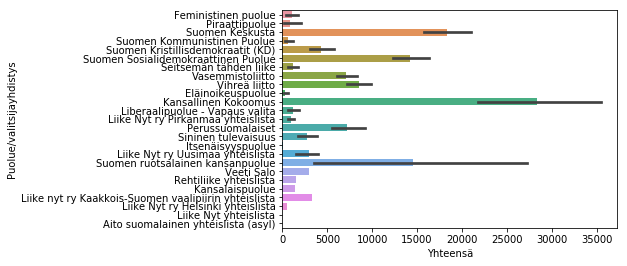

In [7]:
sns.barplot(x='Yhteensä', y='Puolue/valitsijayhdistys', data=df, estimator=np.mean)

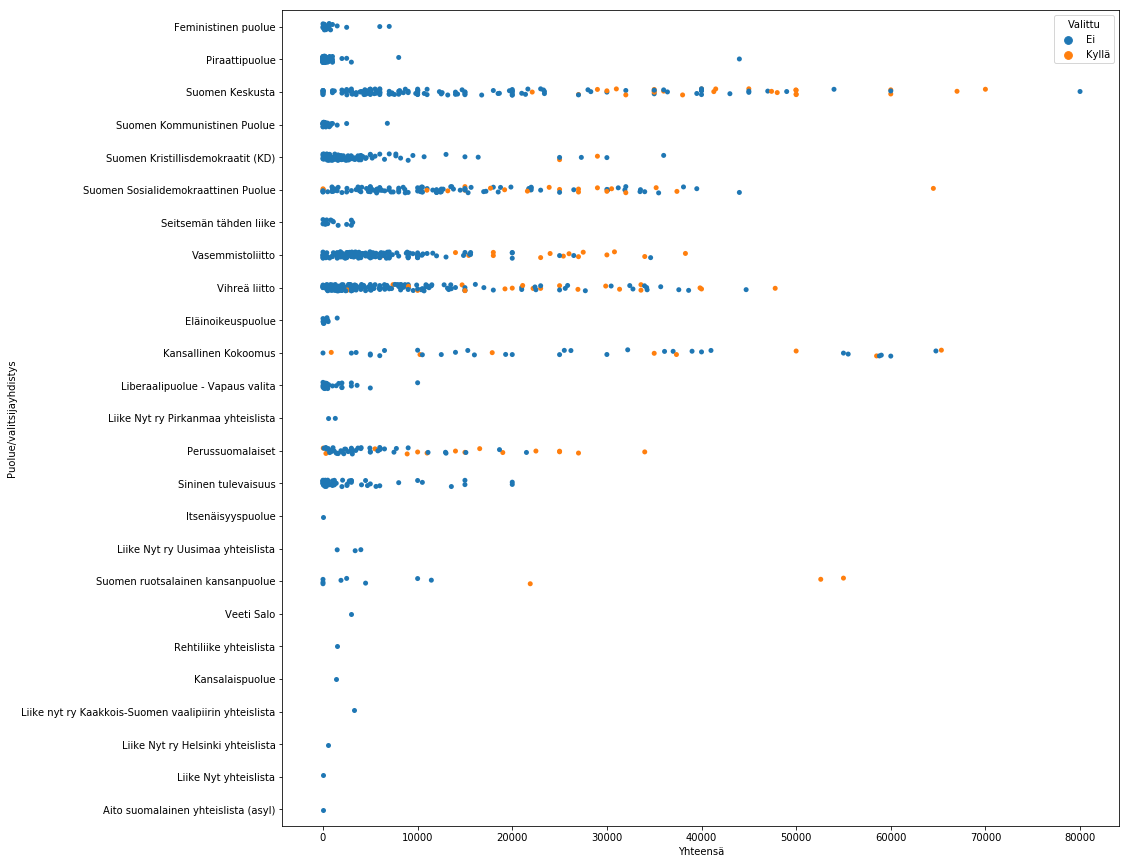

In [8]:
plt.rcParams['figure.figsize']=(15,15)
sns.stripplot(y='Puolue/valitsijayhdistys', x='Yhteensä', data=df, hue='Valittu', jitter=True)

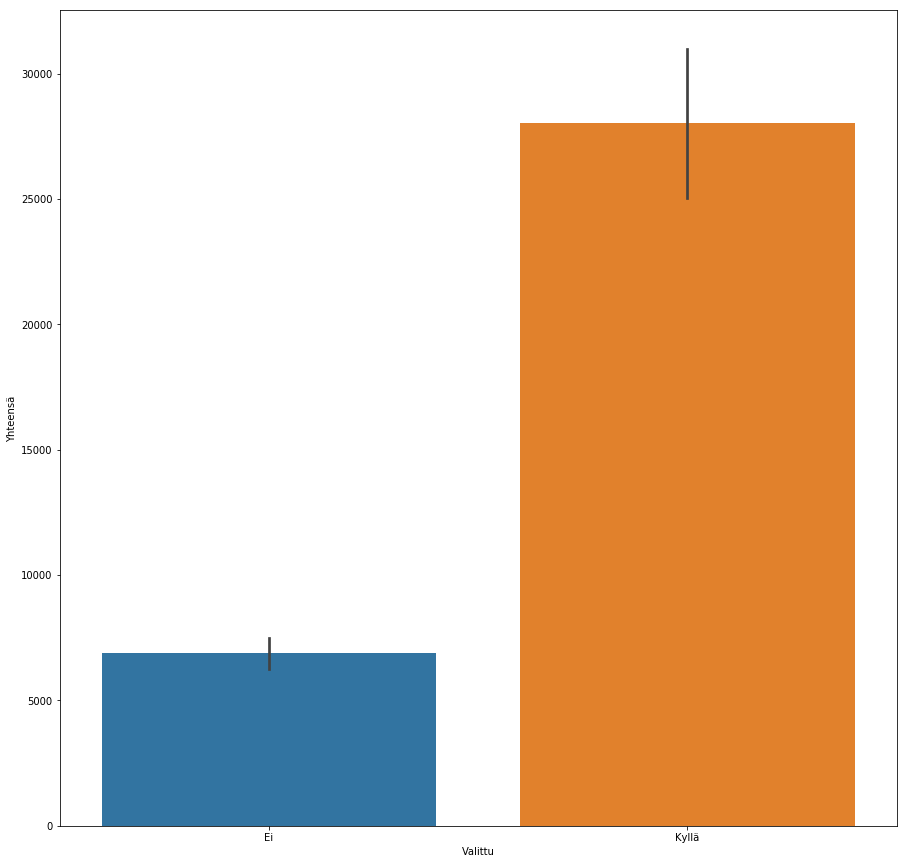

In [9]:
sns.barplot(x='Valittu', y='Yhteensä', data=df, estimator=np.mean)

In [10]:
valitut = df[df['Valittu'] == 'Kyllä']

In [11]:
valitut.describe()

,Yhteensä,Rahoitus yhteensä,Omat varat,Otetut lainat,Tuki yksityishenkilöiltä,Yrityksiltä,Puolueelta,Puolueyhdistyksiltä,Muilta tahoilta,Välitettyä tukea
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,28014.721193,26429.118532,9223.860550,1578.027523,5485.124954,4448.562633,1036.706908,2736.330275,3521.212569,450.596330
std,16008.700643,17057.857883,8368.517684,5166.763801,7021.741498,7749.441691,6694.076312,4553.411367,5209.167172,3660.861675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17698.000000,15000.000000,2000.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27000.000000,26000.000000,7600.000000,0.000000,3000.000000,100.000000,0.000000,876.000000,1000.000000,0.000000
75%,36000.000000,35000.000000,14500.000000,0.000000,7700.000000,5000.000000,0.000000,3500.000000,4000.000000,0.000000
max,70000.000000,70000.000000,40000.000000,30000.000000,32170.000000,38350.000000,64500.000000,24000.000000,22500.000000,37400.000000


In [12]:
valitut.sort_values('Yhteensä', ascending=False).head(10)

,Nimi,"Arvo, ammatti tai toimi",Puolue/valitsijayhdistys,Tukiryhmä,Vaalipiiri,Yhteensä,Rahoitus yhteensä,Omat varat,Otetut lainat,Tuki yksityishenkilöiltä,Yrityksiltä,Puolueelta,Puolueyhdistyksiltä,Muilta tahoilta,Välitettyä tukea,url,Valittu
839,"Kärnä, Mikko","varakansanedustaja, kapteeni evp.",Suomen Keskusta,Lapin karaisemat ry,Lapin vaalipiiri,70000.0,70000.0,0.0,0.0,28000.0,38350.0,0.0,800.0,2850.0,0.0,https://www.vaalirahoitusvalvonta.fi/fi/index/...,Kyllä
2182,"Kurvinen, Antti","kansanedustaja, lakimies",Suomen Keskusta,Lakeudelta eduskuntaan ry,Vaasan vaalipiiri,67000.0,67000.0,2000.0,8000.0,9000.0,23000.0,0.0,24000.0,1000.0,0.0,https://www.vaalirahoitusvalvonta.fi/fi/index/...,Kyllä
1668,"Mykkänen, Kai","sisäministeri, ekonomisti",Kansallinen Kokoomus,Rohkeutta reformeihin ry,Uudenmaan vaalipiiri,65348.0,65348.0,5000.0,0.0,11848.0,30100.0,0.0,0.0,18400.0,0.0,https://www.vaalirahoitusvalvonta.fi/fi/index/...,Kyllä
2026,"Rinne, Antti","kansanedustaja, puolueen puheenjohtaja",Suomen Sosialidemokraattinen Puolue,Suomalaisen työn tekijät ry,Uudenmaan vaalipiiri,64500.0,64500.0,0.0,0.0,0.0,0.0,64500.0,0.0,0.0,0.0,https://www.vaalirahoitusvalvonta.fi/fi/index/...,Kyllä
1549,"Vehviläinen, Anu","kansanedustaja, kunta- ja uudistusministeri",Suomen Keskusta,Maakuntien puolesta ry,Savo-Karjalan vaalipiiri,60000.0,60000.0,14500.0,0.0,9000.0,18000.0,0.0,2000.0,16000.0,500.0,https://www.vaalirahoitusvalvonta.fi/fi/index/...,Kyllä
1538,"Huttunen, Hanna","yrittäjä, metsätalousinsinööri",Suomen Keskusta,Maakuntien Parhaaksi Ry,Savo-Karjalan vaalipiiri,60000.0,60000.0,9000.0,30000.0,5000.0,12000.0,0.0,4000.0,0.0,0.0,https://www.vaalirahoitusvalvonta.fi/fi/index/...,Kyllä
1346,"Marttinen, Matias",valtiovarainministerin talouspoliittinen erity...,Kansallinen Kokoomus,Edistyksellinen Satakunta ry,Satakunnan vaalipiiri,58500.0,58500.0,5000.0,0.0,4500.0,23500.0,0.0,15000.0,10500.0,0.0,https://www.vaalirahoitusvalvonta.fi/fi/index/...,Kyllä
2213,"Henriksson, Anna-Maja","riksdagsledamot, VH kansanedustaja, varatuomari",Suomen ruotsalainen kansanpuolue,,Vaasan vaalipiiri,55000.0,55000.0,0.0,0.0,1000.0,7000.0,26000.0,13000.0,8000.0,0.0,https://www.vaalirahoitusvalvonta.fi/fi/index/...,Kyllä
1963,"Adlercreutz, Anders","arkitekt, riksdagsledamot, arkkitehti, kansane...",Suomen ruotsalainen kansanpuolue,Stödgruppen för Anders Adlercreutz,Uudenmaan vaalipiiri,52600.0,52600.0,0.0,0.0,9500.0,6600.0,9000.0,5000.0,22500.0,0.0,https://www.vaalirahoitusvalvonta.fi/fi/index/...,Kyllä
460,"Kopra, Jukka","kansanedustaja, yrittäjä",Kansallinen Kokoomus,,Kaakkois-Suomen vaalipiiri,50000.0,50000.0,10000.0,0.0,20000.0,15000.0,0.0,5000.0,0.0,0.0,https://www.vaalirahoitusvalvonta.fi/fi/index/...,Kyllä


In [18]:
by_party = disclosures.groupby('Puolue/valitsijayhdistys').mean()

In [ ]:
by_party